In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
nodes = pd.read_csv('greywolf_nodes.csv',dtype=object)
df_nodes = pd.DataFrame(nodes)
edges = pd.read_csv('greywolf_edges.csv',dtype=object)
df_edges = pd.DataFrame(edges)
source = df_edges['Source'].tolist()
target = df_edges['Target'].tolist()
weights = df_edges['Weight'].tolist()
edgelist = list(zip(source, target, weights))
print(df_nodes)

     Id                            Label timeset Degree Weighted Degree  \
0    22                     Smith Barney     NaN      1               1   
1    60             Dean Witter Reynolds     NaN      1               9   
2    70               Goldman Sachs & Co     NaN      7              72   
3   117                          Moody's     NaN      1               3   
4   126                        Citigroup     NaN      1               6   
5   160                  JP Morgan Chase     NaN      1               6   
6   236  Greywolf Capital Management LLP     NaN      9              34   
7   237          Cravath, Swaine & Moore     NaN      1               9   
8   238    Los Alamo National Laboritory     NaN      1               2   
9   239                         Cal Tech     NaN      1               1   
10  240                             CIFG     NaN      1               2   
11  241                             IXIS     NaN      1               1   
12  242                  

Name: 
Type: Graph
Number of nodes: 25
Number of edges: 30
Average degree:   2.4000


/Users/conorbarrycullen/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


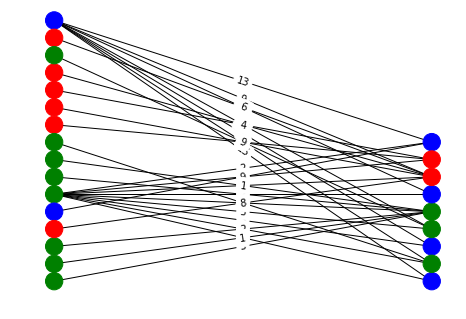

In [3]:
B = nx.Graph()
firms = df_nodes[pd.notna(df_nodes['Label'])]
people = df_nodes[pd.isna(df_nodes['Label'])]
firm_ids = firms['Id'].tolist()
people_ids = people['Id'].tolist()
mod = dict(df_nodes.set_index('Id')['modularity_class'])

B.add_nodes_from(firm_ids, bipartite=0, labels=True)
B.add_nodes_from(people_ids, bipartite=1, labels=True)
B.add_weighted_edges_from(edgelist)

#nx.set_node_attributes(g, "group", mod)
nodecolor = []
for node in B.nodes():
    mod_node = int(mod[node])
    if mod_node==2:
        a = 'green'
    elif mod_node==0:
        a = 'blue'
    else:
        a = 'red'
    #a = 'blue' if node in firm_ids else 'red'
    nodecolor.append(a)

print(nx.info(B))

X, Y = nx.bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, node_color=nodecolor)
labels = nx.get_edge_attributes(B,'weight')
nx.draw_networkx_edge_labels(B,pos,edge_labels=labels)
plt.show()

Name: 
Type: Graph
Number of nodes: 9
Number of edges: 36
Average degree:   8.0000
[('862', '866', {'weight': 16.0}), ('862', '867', {'weight': 7.666666666666666}), ('862', '868', {'weight': 9.0}), ('862', '864', {'weight': 0.8333333333333334}), ('862', '869', {'weight': 13.5}), ('862', '870', {'weight': 4.333333333333333}), ('862', '865', {'weight': 1.6666666666666667}), ('862', '863', {'weight': 9.0}), ('863', '866', {'weight': 17.5}), ('863', '867', {'weight': 8.666666666666666}), ('863', '868', {'weight': 10.0}), ('863', '864', {'weight': 0.6666666666666666}), ('863', '869', {'weight': 15.0}), ('863', '870', {'weight': 4.833333333333333}), ('863', '865', {'weight': 1.3333333333333333}), ('864', '866', {'weight': 3.5}), ('864', '867', {'weight': 2.3333333333333335}), ('864', '868', {'weight': 2.3333333333333335}), ('864', '869', {'weight': 3.5}), ('864', '870', {'weight': 1.1666666666666667}), ('864', '865', {'weight': 1.3333333333333333}), ('865', '866', {'weight': 3.5}), ('865', '

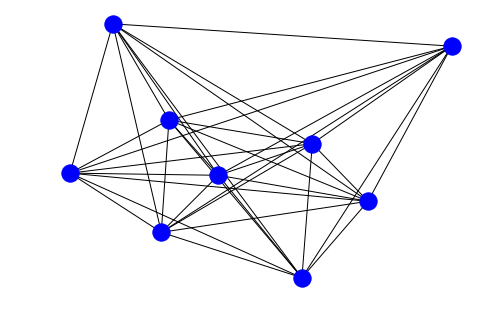

In [4]:
#matrix = nx.bipartite.biadjacency_matrix(B,people_ids)

def my_weight(G, u, v, weight='weight'):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        #Calculate average weight
        w += (int(G.adj[u][nbr].get(weight, 1)) + int(G.adj[v][nbr].get(weight, 1)))/len(G[u])
    return w 

G = nx.bipartite.generic_weighted_projected_graph(B,people_ids,weight_function=my_weight)
nx.draw(G,pos = nx.spring_layout(G),node_color='blue')
print(nx.info(G))
print(G.edges(data=True))

In [5]:
#matrix = nx.adjacency_matrix(G)
matrix = nx.to_numpy_matrix(G)
print(matrix)

[[ 0.          9.          0.83333333  1.66666667 16.          7.66666667
   9.         13.5         4.33333333]
 [ 9.          0.          0.66666667  1.33333333 17.5         8.66666667
  10.         15.          4.83333333]
 [ 0.83333333  0.66666667  0.          1.33333333  3.5         2.33333333
   2.33333333  3.5         1.16666667]
 [ 1.66666667  1.33333333  1.33333333  0.          3.5         2.33333333
   2.33333333  3.5         1.16666667]
 [16.         17.5         3.5         3.5         0.         10.33333333
  11.66666667 17.5         5.66666667]
 [ 7.66666667  8.66666667  2.33333333  2.33333333 10.33333333  0.
   8.66666667 13.          4.16666667]
 [ 9.         10.          2.33333333  2.33333333 11.66666667  8.66666667
   0.         15.          4.83333333]
 [13.5        15.          3.5         3.5        17.5        13.
  15.          0.          4.83333333]
 [ 4.33333333  4.83333333  1.16666667  1.16666667  5.66666667  4.16666667
   4.83333333  4.83333333  0.        ]

In [6]:
np.savetxt("sociomat.csv", matrix, delimiter=",")